In [95]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rd
import csv
import numpy as np
import math
from student_utils import *
from utils import *
# from ipynb.fs.full.gen_inputs import add_weights2
from Christofides import christofides

from queue import PriorityQueue

# Compare two methods

## Select the best output for each input

# Metric TSP Solver

## Method 1: A polynomial-time Algo with cost <= 2*optimal

1. Take the MST of G.
2. Do a DPS on MST to get PT(pseudotour).
3. Go from PT to T* (Take each vertex only the first time it appears in PT)

In [ ]:
G1 = nx.complete_graph(10)
add_weights2(G1, 1, 10)
print(list(G1.edges().data()))
plt.subplot()
nx.draw(G1, node_color='yellow', with_labels=True)

In [ ]:
ta_homes = [0,1,2,3,4]
G1_sub = G1.subgraph(ta_homes)
print(list(G1_sub.edges().data()))
plt.subplot()
nx.draw(G1_sub, node_color='yellow', with_labels=True)

In [ ]:
PT = nx.minimum_spanning_tree(G1_sub)
# print(sorted(PT.edges(data=True)))
print(PT.edges(data=True))

plt.subplot()
nx.draw(PT, node_color='yellow', with_labels=True)

In [ ]:
# TODO: implement dfs yielding pseudotour
list(nx.dfs_edges(PT, source=0))

# Rao drives every TA home: this is a TSP

## Nearest Neighbor Algorithm

In [ ]:
def solve(list_of_locations, list_of_homes, starting_car_location, adjacency_matrix, params=[]):
    start_idx = list_of_locations.index(starting_car_location)
    homes_idx = [list_of_locations.index(h) for h in list_of_homes]
    graph1, msg1 = adjacency_matrix_to_graph(adjacency_matrix)
    path = []
    drop_offs = {}
    current_idx = start_idx
    while homes_idx:
        lst_dist = [(h_idx, nx.shortest_path_length(graph1, current_idx, h_idx, 'weight')) for h_idx in homes_idx]
        idx, _ = min(lst_dist, key=lambda x: x[1])
        shortest_path = nx.shortest_path(graph1, current_idx, idx, 'weight')
        shortest_path.pop()
        path.extend(shortest_path)
        drop_offs[idx] = [idx]
        current_idx = idx
        homes_idx.remove(idx)
    last_shortest_path = nx.shortest_path(graph1, current_idx, start_idx, 'weight')
    path.extend(last_shortest_path)
    return path, drop_offs

In [ ]:
data = read_file('test_inputs/27_50.in')
num_loc, num_house, lst_loc, lst_house, start_loc, adj_mat = data_parser(data)
solve(lst_loc, lst_house, start_loc, adj_mat)

## 2-Approximation using MST

In [ ]:
#code

In [ ]:
#test

## 1.5-Approximation using Christofides Algorithm

In [ ]:
#code

In [ ]:
#test

## Branch-and-bound using the algorithm in the textbook

In [ ]:
#code

In [ ]:
#test

## Branch-and-bound using another lower-bound

In [ ]:
#code

In [ ]:
#test

# Rao drives TAs to some dropoff locations (clusters)

In [26]:
# Constants
MAX = 1e9  # maximum value of edge weight
MIN = 1  # minimum value of edge weight (not real min because we account for FACTOR)
NUM_DEC = 5  # number of decimal numbers for rounding
FACTOR = 0.9 # FACTOR of edge weight
NUM_EDGE_FACTOR = 0.1
START_FACTOR = 0.5
MIN_P = 0.55 # minimum percentage
MAX_P = 0.95 # maximum percentage
SMALL = 48   # small input
MEDIUM = 98 # medium input
LARGE = 198  # large input
TEST_SIZE = 10  # use this to change the size of test cases

# maximum number of TA's / homes
SMALL_TA = 23
MEDIUM_TA = 48
LARGE_TA = 98

In [27]:
def write_to_file(file, string, append=False):
    if append:
        mode = 'a'
    else:
        mode = 'w'
    with open(file, mode) as f:
        f.write(string)


def write_data_to_file(file, data, separator, append=False):
    if append:
        mode = 'a'
    else:
        mode = 'w'
    with open(file, mode) as f:
        for item in data:
            f.write(f'{item}{separator}')
            
def read_file_to_list(file, length):
    lst = []
    with open(file, 'r') as f:
        lst = f.read().splitlines()
    return lst[:length]
            
def print_edge_weights(g, n=5):
    for edge, data in g.edges.items():
        if n <= 0:
            break
        n-=1
        print(edge, data)
        
def convert(lst):
    return ' '.join(lst)

def fix_triangle_inequalities(g):
    done = False
    count = 0
    num_fixes = 0
    while not done:
        done = True
        rs = nx.floyd_warshall(g, weight='weight')
        print("iteration ", count)
        for edge, data in g.edges.items():
            if data['weight'] > rs[edge[0]][edge[1]]:
#                 print('change ' + str(edge) + " " + str(data['weight']) + " to " + str(rs[edge[0]][edge[1]]))
                data['weight'] = rs[edge[0]][edge[1]]
                done = False
                num_fixes += 1
#                 break # with break will lead to less fixes but takes more time to update
        count += 1
    print("total fixes: ", num_fixes)
    
def save_graph(g, filename):
    pickle.dump(g, open(filename, "wb"))

def load_graph(filename):
    return pickle.load( open(filename, "rb"))

In [1]:
def add_weights2(g, lower, upper):
    """Update the weight of each edge to be a random weight within the bounds."""
    for edge, data in g.edges.items():
        w = rd.uniform(lower, upper)
        data['weight'] = round(w, NUM_DEC)

[(0, 1, {'weight': 5.70786}), (0, 2, {'weight': 9.37075}), (0, 3, {'weight': 7.96519}), (0, 4, {'weight': 7.93348}), (0, 5, {'weight': 4.28128}), (0, 6, {'weight': 3.10271}), (0, 7, {'weight': 5.17986}), (0, 8, {'weight': 1.05142}), (0, 9, {'weight': 2.38453}), (1, 2, {'weight': 6.59575}), (1, 3, {'weight': 3.42557}), (1, 4, {'weight': 7.8682}), (1, 5, {'weight': 6.65352}), (1, 6, {'weight': 6.93216}), (1, 7, {'weight': 1.66828}), (1, 8, {'weight': 8.16482}), (1, 9, {'weight': 2.78445}), (2, 3, {'weight': 8.85257}), (2, 4, {'weight': 7.31578}), (2, 5, {'weight': 5.2981}), (2, 6, {'weight': 2.81465}), (2, 7, {'weight': 2.85408}), (2, 8, {'weight': 5.80884}), (2, 9, {'weight': 4.68901}), (3, 4, {'weight': 7.00672}), (3, 5, {'weight': 8.63699}), (3, 6, {'weight': 6.44236}), (3, 7, {'weight': 7.34982}), (3, 8, {'weight': 6.60504}), (3, 9, {'weight': 2.86816}), (4, 5, {'weight': 5.89616}), (4, 6, {'weight': 6.97313}), (4, 7, {'weight': 9.23837}), (4, 8, {'weight': 7.28756}), (4, 9, {'weight

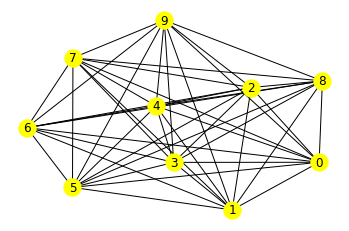

In [12]:
G1 = nx.complete_graph(10)
add_weights2(G1, 1, 10)
print(list(G1.edges().data()))
plt.subplot()
nx.draw(G1, node_color='yellow', with_labels=True)

[(0, 1, {'weight': 5.70786}), (0, 2, {'weight': 9.37075}), (0, 3, {'weight': 7.96519}), (0, 4, {'weight': 7.93348}), (1, 2, {'weight': 6.59575}), (1, 3, {'weight': 3.42557}), (1, 4, {'weight': 7.8682}), (2, 3, {'weight': 8.85257}), (2, 4, {'weight': 7.31578}), (3, 4, {'weight': 7.00672})]


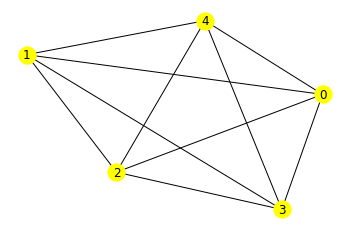

In [13]:
ta_homes = [0,1,2,3,4]
G1_sub = G1.subgraph(ta_homes)
print(list(G1_sub.edges().data()))
plt.subplot()
nx.draw(G1_sub, node_color='yellow', with_labels=True)

[(0, 1, {'weight': 5.70786}), (1, 3, {'weight': 3.42557}), (1, 2, {'weight': 6.59575}), (3, 4, {'weight': 7.00672})]


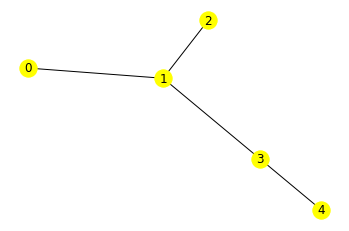

In [14]:
PT = nx.minimum_spanning_tree(G1_sub)
# print(sorted(PT.edges(data=True)))
print(PT.edges(data=True))

plt.subplot()
nx.draw(PT, node_color='yellow', with_labels=True)

In [1]:
# TODO: implement dfs yielding pseudotour
list(nx.dfs_edges(PT, source=0))

NameError: name 'nx' is not defined

[(0, 1, {'weight': 8.25764}), (0, 2, {'weight': 7.35191}), (0, 3, {'weight': 5.89547}), (0, 4, {'weight': 9.79836}), (0, 5, {'weight': 9.15045}), (0, 6, {'weight': 2.14536}), (0, 7, {'weight': 5.40681}), (0, 8, {'weight': 3.62263}), (0, 9, {'weight': 3.43492}), (1, 2, {'weight': 7.58326}), (1, 3, {'weight': 2.11398}), (1, 4, {'weight': 6.5734}), (1, 5, {'weight': 4.67561}), (1, 6, {'weight': 2.72898}), (1, 7, {'weight': 3.17201}), (1, 8, {'weight': 7.79964}), (1, 9, {'weight': 1.37258}), (2, 3, {'weight': 7.69508}), (2, 4, {'weight': 6.37204}), (2, 5, {'weight': 3.76264}), (2, 6, {'weight': 9.63992}), (2, 7, {'weight': 5.02863}), (2, 8, {'weight': 5.51295}), (2, 9, {'weight': 1.3278}), (3, 4, {'weight': 5.87939}), (3, 5, {'weight': 8.23325}), (3, 6, {'weight': 7.32713}), (3, 7, {'weight': 3.46668}), (3, 8, {'weight': 5.97076}), (3, 9, {'weight': 8.75928}), (4, 5, {'weight': 9.49272}), (4, 6, {'weight': 1.91292}), (4, 7, {'weight': 2.518}), (4, 8, {'weight': 6.23663}), (4, 9, {'weight':

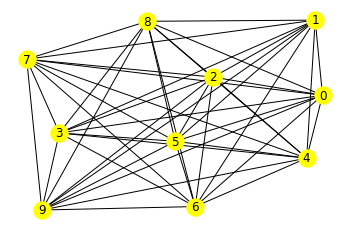

In [32]:
G1 = nx.complete_graph(10)
add_weights2(G1, 1, 10)
print(list(G1.edges().data()))
plt.subplot()
nx.draw(G1, node_color='yellow', with_labels=True)

/home/radar/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


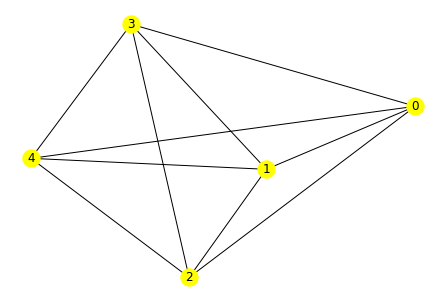

In [126]:
# ta_homes = [0,1,2,3,4]
# G1_sub = G1.subgraph(ta_homes)
# print(list(G1_sub.edges().data()))
# plt.subplot()
# nx.draw(G1_sub, node_color='yellow', with_labels=True)

G1 = nx.complete_graph(5)
add_weights2(G1, 1, 10)
nx.draw(G1, node_color='yellow', with_labels=True)

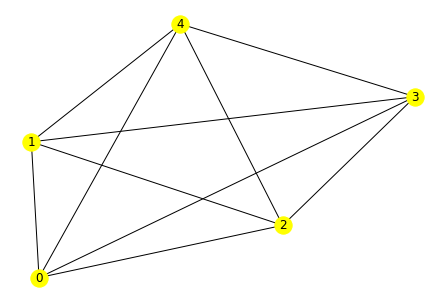

In [127]:
# G1.remove_edge(0,1)
nx.draw(G1, node_color='yellow', with_labels=True)

In [3]:
# list_of_locations, list_of_homes, starting_car_location, adjacency_matrix, 

def is_complete_graph(g):
    n = len(g.nodes())
    return (n * (n-1) / 2) == len(g.edges())

def convert_to_complete_graph(g, starting_car_location, list_of_homes, list_of_locations):
    rs = nx.floyd_warshall(g, weight='weight')
    result_g = nx.Graph()
    start_idx = list_of_locations.index(starting_car_location)
    homes_idx = [list_of_locations.index(h) for h in list_of_homes]
    subgraph_idx = [start_idx] + homes_idx
    subgraph = g.subgraph(subgraph_idx)
    subgraph = subgraph.copy()
    for i in range(len(subgraph_idx)):
        for j in range(i+1, len(subgraph_idx)):
            v0 = subgraph_idx[i]
            v1 = subgraph_idx[j]
            if not subgraph.has_edge(v0, v1):
                subgraph.add_edge(v0, v1, weight = rs[v0][v1])
#                 subgraph.edges[(i, j)]['weight'] = rs[i][j]
    return subgraph
                

# converted_g=convert_to_complete_graph(G1, 0, [1, 2, 3], [0,1,2,3])  
# print(is_complete_graph(converted_g))        
# nx.draw(converted_g, node_color='yellow', with_labels=True)

def lowerbound1(g, V, S, a, b):
    print("lowerbound1: S(current path) = ", S)
    V_set = set(V)
    S_set = set(S)
    V_minus_S = V_set.difference(S_set)
    
    cur_min_weight_a = float('inf')
    cur_min_weight_b = float('inf')
    
     # the lighest edge from node to V - S
    def find_min_weight(node):
        node_nb_set = set(g.neighbors(node))
        node_nb_intersect_V_minus_S = node_nb_set.intersection(V_minus_S)
        cur_min_weight_node =  float('inf')
        print("for node", node, "its neighbors", node_nb_intersect_V_minus_S)
        for node_nb_V_minus_S in node_nb_intersect_V_minus_S:
            cur_min_weight_node = min(cur_min_weight_node,  g.edges[(node, node_nb_V_minus_S)]['weight'])
        return cur_min_weight_node

 
    # the lighest edge from a to V - S
    cur_min_weight_a = find_min_weight(a)
    
    # the lighest edge from b to V - S
    cur_min_weight_b = find_min_weight(b)
    
    # find the sum of weights of MST 
    V_minus_S_subgraph = g.subgraph(list(V_minus_S))
    
    mst = nx.minimum_spanning_tree(V_minus_S_subgraph)
    sum_weight_mst = sum([data['weight'] for edge, data in mst.edges.items()])
    
    assert cur_min_weight_a != float('inf') and cur_min_weight_b != float('inf')
    return cur_min_weight_a + cur_min_weight_b + sum_weight_mst

def branch_and_bound(g, starting_vertex, lower_bound):
    active_subproblems = PriorityQueue()
    active_subproblems.put((lower_bound(g, g.nodes(), [starting_vertex], starting_vertex, starting_vertex), (starting_vertex, [starting_vertex], starting_vertex)))
    best_so_far = float('inf')
    
    while active_subproblems.qsize() > 0:
        # choose
        active_sub = active_subproblems.get()[1]
        print("active_sub=", active_sub)
        # expand
        V_set = set(g.nodes())
        S_set = set(tuple(active_sub[1]))
        V_minus_S = V_set.difference(S_set)
        
        for x in V_minus_S:
            path = active_sub[1]+[x]
            P = (active_sub[0], path , x)
            print("P = ", P)
            # complete sol
            total_w = 0
            
            
            if len(path) == len(g.nodes()):
                for i in range(len(path)-1):
#                     print("***********")
#                     print(path[i], path[i+1])
                    total_w += g.edges[(path[i], path[i+1])]['weight']
                best_so_far = total_w
        
           
            # if lowerbound < bestsofar add Pi to S
#             cur_lower_bound = 
            else:
                cur_lower_bound = lower_bound(g, g.nodes(), path, active_sub[0], x)
                if cur_lower_bound < best_so_far:
                    active_subproblems.put((cur_lower_bound, P))
                #(g, V, S, a, b): 
    return best_so_far



In [4]:
# print(lowerbound(G1, G1.nodes(), [0], 0, 0))
branch_and_bound(G1, 0, lowerbound1)
# q = PriorityQueue()
# q.put((1, "a"))
# q.put((-1, "b"))
# # print(q.get())
# # print(q.get())
# print(q.qsize())
# print(set(tuple([1,2,3])))

NameError: name 'G1' is not defined

In [69]:
def bb_solve(list_of_locations, list_of_homes, starting_car_location, adjacency_matrix, params=[]):
    start_idx = list_of_locations.index(starting_car_location)
    homes_idx = [list_of_locations.index(h) for h in list_of_homes]
    graph1, msg1 = adjacency_matrix_to_graph(adjacency_matrix)
    converted_g = convert_to_complete_graph(graph1, starting_car_location, list_of_homes, list_of_locations)
    print(is_complete_graph(converted_g)) 
#     (g, starting_car_location, list_of_homes, list_of_locations):

In [71]:
data = read_file('test_inputs/27_100.in')
num_loc, num_house, lst_loc, lst_house, start_loc, adj_mat = data_parser(data)
bb_solve(lst_loc, lst_house, start_loc, adj_mat)

True
